In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [19]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 3s 1us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

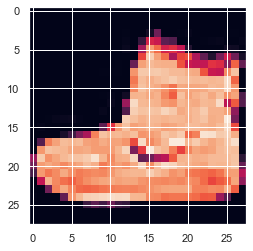

In [22]:
plt.imshow(x_train[0])

In [20]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[9 0 0 3 0]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [24]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [25]:
# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


In [26]:
X_train = flatten(x_train)
X_test = flatten(x_test)

In [27]:
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [28]:
# Instantiate a sequential model
model1 = Sequential()
  
# Add dense layers
model1.add(Dense(128, input_shape=(784,), activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
  
# Add a dense layer with as many neurons as prosper rating
model1.add(Dense(10, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
# Fit your model to the training data for 200 epochs
model1.fit(X_train, y_train, validation_split=0.25, epochs=25)

# Evaluate your model accuracy on the test data
accuracy = model1.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

# Predict on coords_small_test
preds = model1.predict(X_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
    print("{} | {}".format(pred,y_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
    print("{:25} | {}".format(pred,y_test[i]))

Epoch 1/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3917 - accuracy: 0.8604 - val_loss: 0.4184 - val_accuracy: 0.8545
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3760 - accuracy: 0.8656 - val_loss: 0.4214 - val_accuracy: 0.8469
Epoch 3/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3580 - accuracy: 0.8708 - val_loss: 0.3932 - val_accuracy: 0.8649
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3504 - accuracy: 0.8755 - val_loss: 0.4098 - val_accuracy: 0.8571
Epoch 5/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3407 - accuracy: 0.8782 - val_loss: 0.3863 - val_accuracy: 0.8671
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3320 - accuracy: 0.8814 - val_loss: 0.3679 - val_accuracy: 0.8711
Epoch 7/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3163 - accuracy: 0.8863 - val_loss: 0.3957 - val_accur

In [32]:
accuracy # on unseen data

0.8769000172615051

#### we used 50 epochs however, you can just use 10 and you will also get a great accuracy.